# Here is a bookmark to help visualize the features given by the CNN

In [9]:
import numpy as np
import sklearn
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## We visualize the data using a PCA to reduce the dimension
We visualize in this notebook the features extracted from the 2nd fully connected layer, which is the layer which segments the most the features. 
This layer gave me the best result to see the clusters of objects and condition. 


560


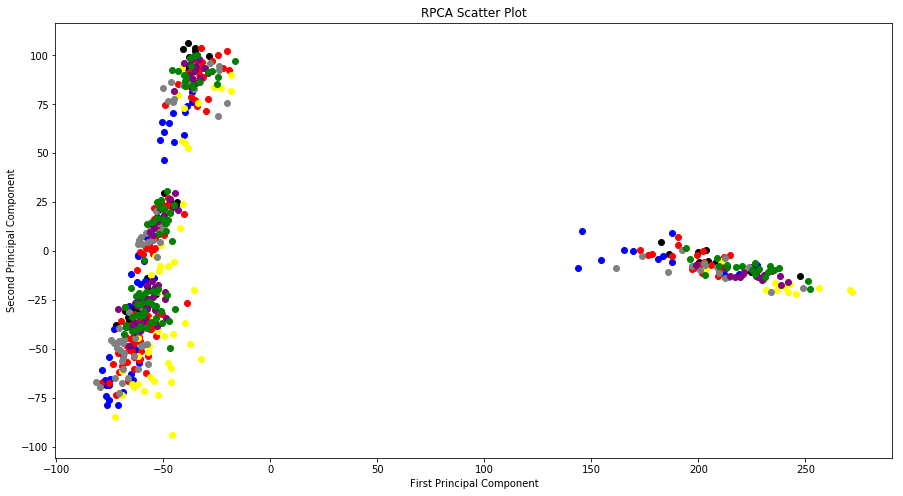

In [13]:
y_array = np.load('labels.npy')
X_array = np.load('features.npy')
print(len(y_array))
markr=['o','+','-','*','h']

model = ['allen','clamp','driver','flat','pen','screw','usb']

# Create a Randomized PCA model that takes two components
randomized_pca = PCA(svd_solver='full', n_components=7)
# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(X_array)

colors = ['black','blue','red','yellow','grey','purple','green']
x=[]
y=[]
plt.figure(figsize=(15,8))
for i in model:
    for j in range(len(X_array)):
        if (y_array[j][1] == i):
            x.append(reduced_data_rpca[j, 0])
            y.append(reduced_data_rpca[j, 1])

    plt.scatter(x[:120], y[:120], c=colors[model.index(i)])
    x=[]
    y=[]
                          

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("RPCA Scatter Plot")

plt.show()

On s'apercoit que les images sont triées par type d'objet, mais également et surtout par type de condition. On affine la visualtion.
# On affiche les features en fonction de la condition et de l'objet
Les couleurs montrent les différents objets, et les markers les diférentes conditions

560


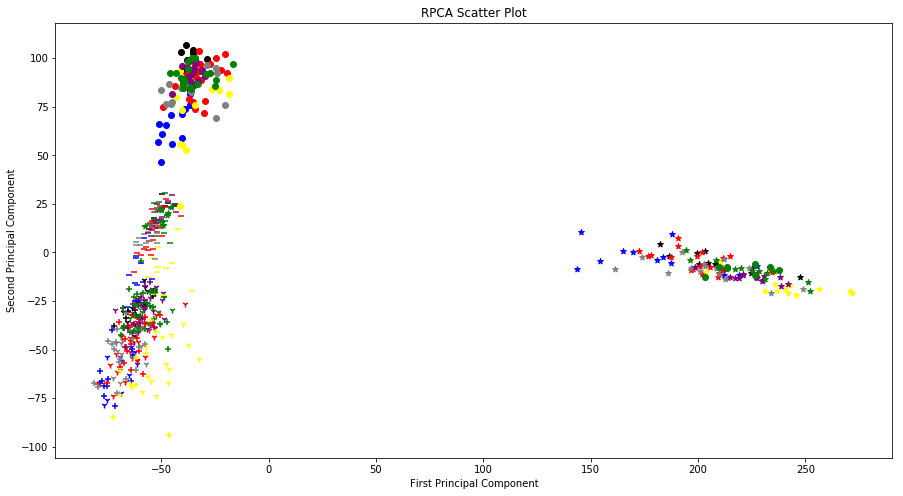

In [18]:
y_array = np.load('labels.npy')
X_array = np.load('features.npy')
print(len(y_array))
markr=['1','+','_','*','o']
markr_=[112,224,336,448,560]

model = ['allen','clamp','driver','flat','pen','screw','usb']

# Create a Randomized PCA model that takes two components
randomized_pca = PCA(svd_solver='full', n_components=7)
# Fit and transform the data to the model
reduced_data_rpca = randomized_pca.fit_transform(X_array)

colors = ['black','blue','red','yellow','grey','purple','green']
x=[]
y=[]
plt.figure(figsize=(15,8))
for r in markr:
    for i in model:
        for j in range(markr_[markr.index(r)]-120,markr_[markr.index(r)]):
            if (y_array[j][1] == i):
                x.append(reduced_data_rpca[j, 0])
                y.append(reduced_data_rpca[j, 1])

        plt.scatter(x, y, c=colors[model.index(i)], marker=r)

        x=[]
        y=[]

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title("RPCA Scatter Plot")

plt.show()

# Il reste du travail!
On s'apercoit que l'algorithme distingue avant tout les images en fonction de leurs conditions plutot que de l'outils. Il va falloir trouve une méthode pour modifier cette erreur, sans quoi le clustering va etre impossible. On s'apercoit que les conditons les plus contraignantes (4 et 5) sont bien isolées par rapport aux autres.

Après je ne sais pas dans quelle mesure le PCA conserve le mieux les features et permet de bien les visualiser. Comme vous pouvez le voir dans l'autre notebook, la classification en utilisant un SVM est tout de même très performante.

# Visualiser avec t-SNE

In [21]:
Xarr=np.load('features.npy')
labels = np.load("labels.npy")

La dimension de nos données (512) est trop grande pouyr les mettre directement dans t-SNE. C'est pourquoi on utilise d'abord un PCA pour les réduire en dimension 50.

In [23]:
from sklearn.decomposition import PCA
pca_50 = PCA(n_components=50)
Xpca = pca_50.fit_transform(Xarr)
print(Xpca.shape)

(560, 50)


In [24]:
import time

from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=500)
Xtsne = tsne.fit_transform(Xpca)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
Xtsne=np.transpose(Xtsne)
x=Xtsne[0]
y=Xtsne[1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 560 samples in 0.012s...
[t-SNE] Computed neighbors for 560 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 560 / 560
[t-SNE] Mean sigma: 39.629328
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.119495
[t-SNE] Error after 500 iterations: 0.523084
t-SNE done! Time elapsed: 6.0154500007629395 seconds


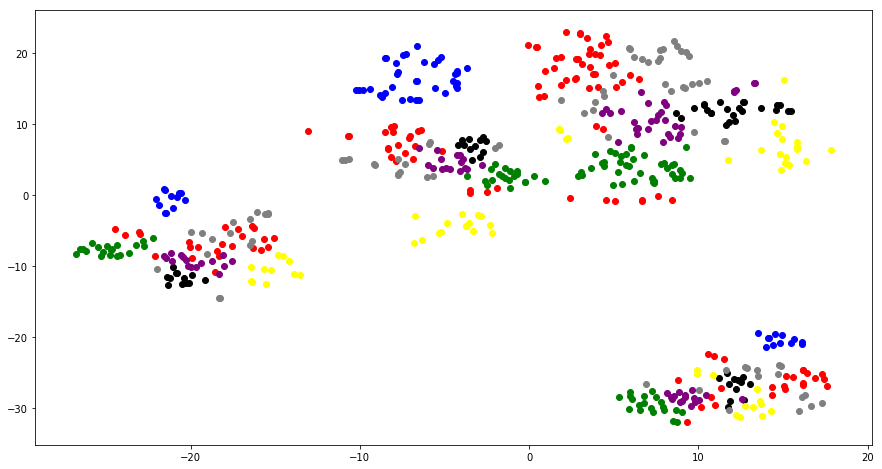

In [27]:
xx=[]
yy=[]
model = ['allen','clamp','driver','flat','pen','screw','usb']
colors = ['black','blue','red','yellow','grey','purple','green']
plt.figure(figsize=(15,8))
for i in model:
    for j in range(len(x)):
        if (labels[j][1] == i):
            xx.append(x[j])
            yy.append(y[j])
    plt.scatter(xx, yy, c=colors[model.index(i)])
    xx=[]
    yy=[]

plt.show()



t-SNE permet d'écarter plus les données entre-elles. En effet il rassemble les données similaires et éloige les données qui ne sont pas similaires.